In [2]:
#Googleドライブにアクセスできるようにする
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
% cd /content/drive/MyDrive/UmaMusume_detection

/content/drive/MyDrive/UmaMusume_detection


In [ ]:
! wget https://raw.githubusercontent.com/nagadomi/lbpcascade_animeface/master/lbpcascade_animeface.xml

--2022-03-23 04:41:03--  https://raw.githubusercontent.com/nagadomi/lbpcascade_animeface/master/lbpcascade_animeface.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246945 (241K) [text/plain]
Saving to: ‘lbpcascade_animeface.xml.1’

lbpcascade_animefac 100%[===================>] 241.16K  --.-KB/s    in 0.03s   

2022-03-23 04:41:03 (8.68 MB/s) - ‘lbpcascade_animeface.xml.1’ saved [246945/246945]



21.0[sec]


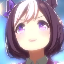

save faces/tmp/3_0.jpg
21.0[sec]


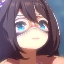

save faces/tmp/3_1.jpg
21.0[sec]


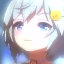

save faces/tmp/3_2.jpg
22.5[sec]


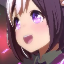

save faces/tmp/3_3.jpg
22.5[sec]


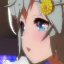

save faces/tmp/3_4.jpg
22.5[sec]


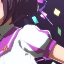

save faces/tmp/3_5.jpg
23.0[sec]


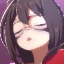

save faces/tmp/3_6.jpg
23.0[sec]


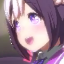

save faces/tmp/3_7.jpg
23.5[sec]


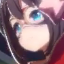

save faces/tmp/3_8.jpg
24.5[sec]


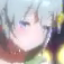

save faces/tmp/3_9.jpg
25.0[sec]


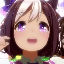

save faces/tmp/3_10.jpg
25.0[sec]


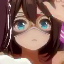

save faces/tmp/3_11.jpg
25.0[sec]


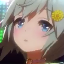

save faces/tmp/3_12.jpg
25.5[sec]


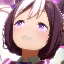

save faces/tmp/3_13.jpg
25.5[sec]


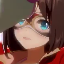

save faces/tmp/3_14.jpg
25.5[sec]


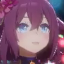

save faces/tmp/3_15.jpg
26.0[sec]


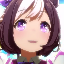

save faces/tmp/3_16.jpg
26.0[sec]


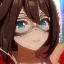

save faces/tmp/3_17.jpg
26.0[sec]


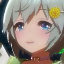

save faces/tmp/3_18.jpg
26.5[sec]


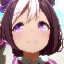

save faces/tmp/3_19.jpg
26.5[sec]


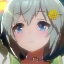

save faces/tmp/3_20.jpg
27.0[sec]


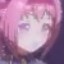

save faces/tmp/3_21.jpg
27.0[sec]


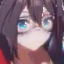

save faces/tmp/3_22.jpg
27.0[sec]


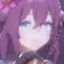

save faces/tmp/3_23.jpg
27.0[sec]


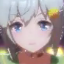

save faces/tmp/3_24.jpg
27.0[sec]


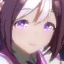

save faces/tmp/3_25.jpg
27.5[sec]


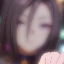

save faces/tmp/3_26.jpg
27.5[sec]


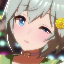

save faces/tmp/3_27.jpg
28.0[sec]


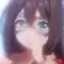

save faces/tmp/3_28.jpg
28.5[sec]


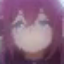

save faces/tmp/3_29.jpg
28.5[sec]


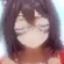

save faces/tmp/3_30.jpg
29.0[sec]


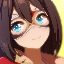

save faces/tmp/3_31.jpg
30.0[sec]


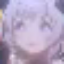

save faces/tmp/3_32.jpg
30.0[sec]


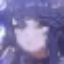

save faces/tmp/3_33.jpg
30.0[sec]


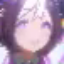

save faces/tmp/3_34.jpg
30.0[sec]


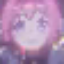

save faces/tmp/3_35.jpg
30.5[sec]


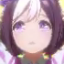

save faces/tmp/3_36.jpg
30.5[sec]


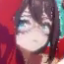

save faces/tmp/3_37.jpg
30.5[sec]


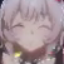

save faces/tmp/3_38.jpg
30.5[sec]


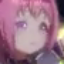

save faces/tmp/3_39.jpg
31.0[sec]


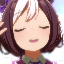

save faces/tmp/3_40.jpg
31.5[sec]


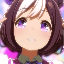

save faces/tmp/3_41.jpg
32.5[sec]


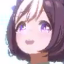

save faces/tmp/3_42.jpg
32.5[sec]


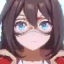

save faces/tmp/3_43.jpg
32.5[sec]


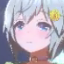

save faces/tmp/3_44.jpg
32.5[sec]


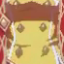

save faces/tmp/3_45.jpg
32.5[sec]


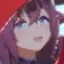

save faces/tmp/3_46.jpg
33.0[sec]


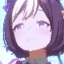

save faces/tmp/3_47.jpg
33.0[sec]


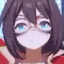

save faces/tmp/3_48.jpg
33.0[sec]


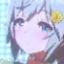

save faces/tmp/3_49.jpg
33.0[sec]


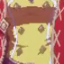

save faces/tmp/3_50.jpg
33.5[sec]


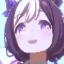

save faces/tmp/3_51.jpg
33.5[sec]


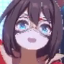

save faces/tmp/3_52.jpg
33.5[sec]


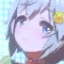

save faces/tmp/3_53.jpg
34.0[sec]


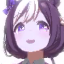

save faces/tmp/3_54.jpg
34.0[sec]


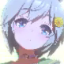

save faces/tmp/3_55.jpg
34.0[sec]


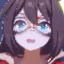

save faces/tmp/3_56.jpg
34.5[sec]


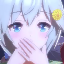

save faces/tmp/3_57.jpg
35.0[sec]


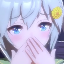

save faces/tmp/3_58.jpg
35.5[sec]


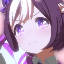

save faces/tmp/3_59.jpg
36.0[sec]


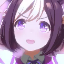

save faces/tmp/3_60.jpg
36.5[sec]


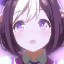

save faces/tmp/3_61.jpg
36.5[sec]


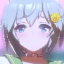

save faces/tmp/3_62.jpg
36.5[sec]


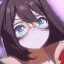

save faces/tmp/3_63.jpg
37.5[sec]


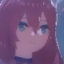

save faces/tmp/3_64.jpg
37.5[sec]


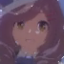

save faces/tmp/3_65.jpg
38.0[sec]


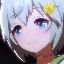

save faces/tmp/3_66.jpg
38.5[sec]


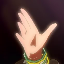

save faces/tmp/3_67.jpg
38.5[sec]


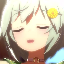

save faces/tmp/3_68.jpg
39.0[sec]


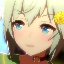

save faces/tmp/3_69.jpg
39.5[sec]


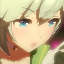

save faces/tmp/3_70.jpg
40.0[sec]


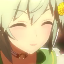

save faces/tmp/3_71.jpg
40.5[sec]


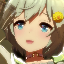

save faces/tmp/3_72.jpg
41.0[sec]


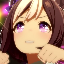

save faces/tmp/3_73.jpg
41.5[sec]


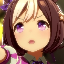

save faces/tmp/3_74.jpg
41.5[sec]


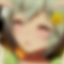

save faces/tmp/3_75.jpg
42.0[sec]


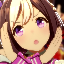

save faces/tmp/3_76.jpg
42.5[sec]


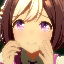

save faces/tmp/3_77.jpg
43.0[sec]


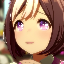

save faces/tmp/3_78.jpg
45.0[sec]


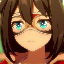

save faces/tmp/3_79.jpg
45.5[sec]


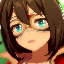

save faces/tmp/3_80.jpg
46.0[sec]


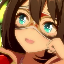

save faces/tmp/3_81.jpg
46.5[sec]


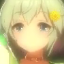

save faces/tmp/3_82.jpg
46.5[sec]


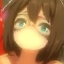

save faces/tmp/3_83.jpg
47.0[sec]


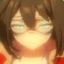

save faces/tmp/3_84.jpg
47.0[sec]


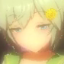

save faces/tmp/3_85.jpg
47.0[sec]


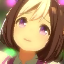

save faces/tmp/3_86.jpg
47.5[sec]


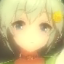

save faces/tmp/3_87.jpg
47.5[sec]


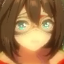

save faces/tmp/3_88.jpg
47.5[sec]


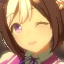

save faces/tmp/3_89.jpg
48.0[sec]


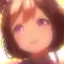

save faces/tmp/3_90.jpg
48.0[sec]


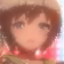

save faces/tmp/3_91.jpg
48.0[sec]


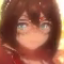

save faces/tmp/3_92.jpg
49.0[sec]


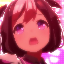

save faces/tmp/3_93.jpg
49.5[sec]


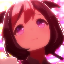

save faces/tmp/3_94.jpg
50.0[sec]


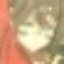

save faces/tmp/3_95.jpg
51.5[sec]


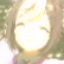

save faces/tmp/3_96.jpg
52.0[sec]


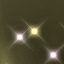

save faces/tmp/3_97.jpg
52.5[sec]


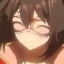

save faces/tmp/3_98.jpg
52.5[sec]


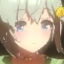

save faces/tmp/3_99.jpg
53.0[sec]


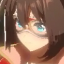

save faces/tmp/3_100.jpg
53.0[sec]


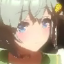

save faces/tmp/3_101.jpg
53.5[sec]


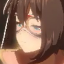

save faces/tmp/3_102.jpg
53.5[sec]


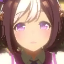

save faces/tmp/3_103.jpg
54.0[sec]


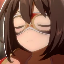

save faces/tmp/3_104.jpg
54.0[sec]


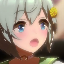

save faces/tmp/3_105.jpg
54.5[sec]


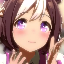

save faces/tmp/3_106.jpg
54.5[sec]


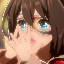

save faces/tmp/3_107.jpg
54.5[sec]


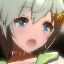

save faces/tmp/3_108.jpg
55.0[sec]


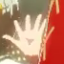

save faces/tmp/3_109.jpg
55.0[sec]


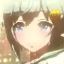

save faces/tmp/3_110.jpg
58.0[sec]


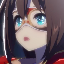

save faces/tmp/3_111.jpg
58.5[sec]


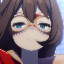

save faces/tmp/3_112.jpg
59.0[sec]


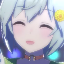

save faces/tmp/3_113.jpg
59.5[sec]


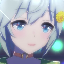

save faces/tmp/3_114.jpg
60.5[sec]


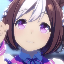

save faces/tmp/3_115.jpg
61.0[sec]


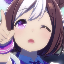

save faces/tmp/3_116.jpg
61.5[sec]


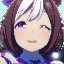

save faces/tmp/3_117.jpg
62.0[sec]


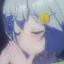

save faces/tmp/3_118.jpg
62.0[sec]


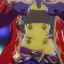

save faces/tmp/3_119.jpg
63.0[sec]


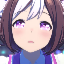

save faces/tmp/3_120.jpg
63.5[sec]


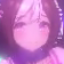

save faces/tmp/3_121.jpg
64.0[sec]


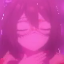

save faces/tmp/3_122.jpg
64.5[sec]


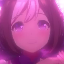

save faces/tmp/3_123.jpg
66.0[sec]


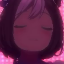

save faces/tmp/3_124.jpg
66.5[sec]


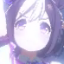

save faces/tmp/3_125.jpg
67.0[sec]


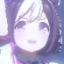

save faces/tmp/3_126.jpg
67.5[sec]


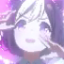

save faces/tmp/3_127.jpg
68.0[sec]


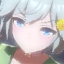

save faces/tmp/3_128.jpg
68.5[sec]


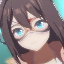

save faces/tmp/3_129.jpg
68.5[sec]


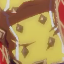

save faces/tmp/3_130.jpg
69.0[sec]


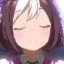

save faces/tmp/3_131.jpg
69.5[sec]


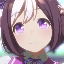

save faces/tmp/3_132.jpg
70.5[sec]


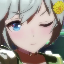

save faces/tmp/3_133.jpg
71.0[sec]


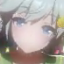

save faces/tmp/3_134.jpg
71.5[sec]


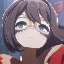

save faces/tmp/3_135.jpg
73.0[sec]


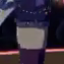

save faces/tmp/3_136.jpg
73.5[sec]


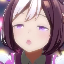

save faces/tmp/3_137.jpg
73.5[sec]


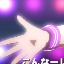

save faces/tmp/3_138.jpg
74.0[sec]


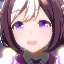

save faces/tmp/3_139.jpg
74.5[sec]


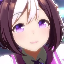

save faces/tmp/3_140.jpg
75.0[sec]


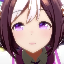

save faces/tmp/3_141.jpg
75.5[sec]


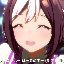

save faces/tmp/3_142.jpg
76.0[sec]


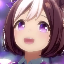

save faces/tmp/3_143.jpg
76.5[sec]


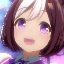

save faces/tmp/3_144.jpg
77.0[sec]


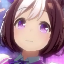

save faces/tmp/3_145.jpg
77.5[sec]


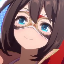

save faces/tmp/3_146.jpg
78.0[sec]


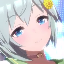

save faces/tmp/3_147.jpg
78.5[sec]


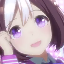

save faces/tmp/3_148.jpg
79.0[sec]


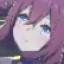

save faces/tmp/3_149.jpg
79.5[sec]


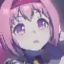

save faces/tmp/3_150.jpg
80.5[sec]


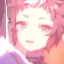

save faces/tmp/3_151.jpg
81.5[sec]


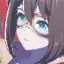

save faces/tmp/3_152.jpg
82.0[sec]


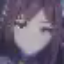

save faces/tmp/3_153.jpg
83.0[sec]


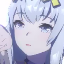

save faces/tmp/3_154.jpg
84.5[sec]


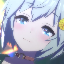

save faces/tmp/3_155.jpg
85.0[sec]


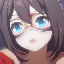

save faces/tmp/3_156.jpg
85.0[sec]


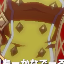

save faces/tmp/3_157.jpg
85.5[sec]


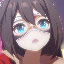

save faces/tmp/3_158.jpg
86.0[sec]


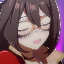

save faces/tmp/3_159.jpg
86.5[sec]


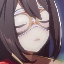

save faces/tmp/3_160.jpg
90.5[sec]


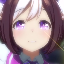

save faces/tmp/3_161.jpg
91.0[sec]


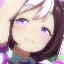

save faces/tmp/3_162.jpg
91.5[sec]


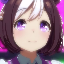

save faces/tmp/3_163.jpg
92.0[sec]


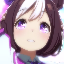

save faces/tmp/3_164.jpg
92.5[sec]


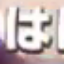

save faces/tmp/3_165.jpg
93.5[sec]


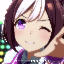

save faces/tmp/3_166.jpg
96.5[sec]


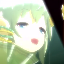

save faces/tmp/3_167.jpg
97.0[sec]


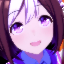

save faces/tmp/3_168.jpg
97.0[sec]


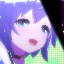

save faces/tmp/3_169.jpg
98.5[sec]


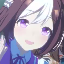

save faces/tmp/3_170.jpg
99.0[sec]


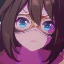

save faces/tmp/3_171.jpg
103.0[sec]


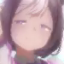

save faces/tmp/3_172.jpg
103.5[sec]


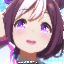

save faces/tmp/3_173.jpg
104.0[sec]


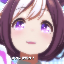

save faces/tmp/3_174.jpg
104.5[sec]


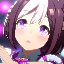

save faces/tmp/3_175.jpg
105.0[sec]


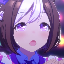

save faces/tmp/3_176.jpg
105.5[sec]


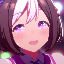

save faces/tmp/3_177.jpg
106.0[sec]


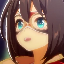

save faces/tmp/3_178.jpg
106.5[sec]


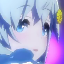

save faces/tmp/3_179.jpg
107.0[sec]


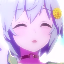

save faces/tmp/3_180.jpg
108.5[sec]


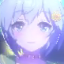

save faces/tmp/3_181.jpg
108.5[sec]


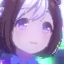

save faces/tmp/3_182.jpg
108.5[sec]


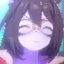

save faces/tmp/3_183.jpg
109.5[sec]


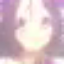

save faces/tmp/3_184.jpg
110.5[sec]


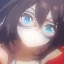

save faces/tmp/3_185.jpg
110.5[sec]


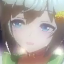

save faces/tmp/3_186.jpg
110.5[sec]


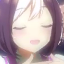

save faces/tmp/3_187.jpg
111.0[sec]


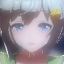

save faces/tmp/3_188.jpg
111.0[sec]


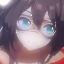

save faces/tmp/3_189.jpg
111.0[sec]


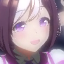

save faces/tmp/3_190.jpg
111.5[sec]


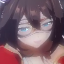

save faces/tmp/3_191.jpg
111.5[sec]


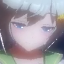

save faces/tmp/3_192.jpg
112.0[sec]


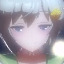

save faces/tmp/3_193.jpg
112.0[sec]


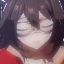

save faces/tmp/3_194.jpg
112.0[sec]


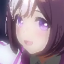

save faces/tmp/3_195.jpg
112.5[sec]


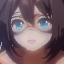

save faces/tmp/3_196.jpg
112.5[sec]


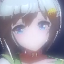

save faces/tmp/3_197.jpg
112.5[sec]


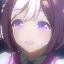

save faces/tmp/3_198.jpg
113.0[sec]


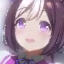

save faces/tmp/3_199.jpg
113.0[sec]


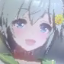

save faces/tmp/3_200.jpg
113.0[sec]


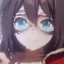

save faces/tmp/3_201.jpg
113.5[sec]


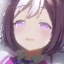

save faces/tmp/3_202.jpg
113.5[sec]


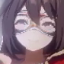

save faces/tmp/3_203.jpg
113.5[sec]


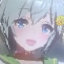

save faces/tmp/3_204.jpg
113.5[sec]


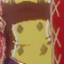

save faces/tmp/3_205.jpg
114.0[sec]


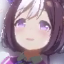

save faces/tmp/3_206.jpg
114.0[sec]


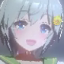

save faces/tmp/3_207.jpg
114.0[sec]


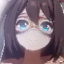

save faces/tmp/3_208.jpg
114.0[sec]


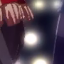

save faces/tmp/3_209.jpg
114.5[sec]


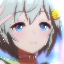

save faces/tmp/3_210.jpg
115.0[sec]


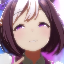

save faces/tmp/3_211.jpg
116.0[sec]


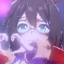

save faces/tmp/3_212.jpg
116.0[sec]


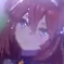

save faces/tmp/3_213.jpg
116.0[sec]


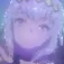

save faces/tmp/3_214.jpg
116.0[sec]


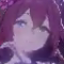

save faces/tmp/3_215.jpg
116.5[sec]


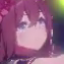

save faces/tmp/3_216.jpg
116.5[sec]


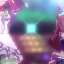

save faces/tmp/3_217.jpg
116.5[sec]


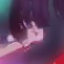

save faces/tmp/3_218.jpg
117.0[sec]


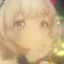

save faces/tmp/3_219.jpg
117.5[sec]


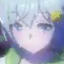

save faces/tmp/3_220.jpg
119.0[sec]


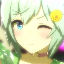

save faces/tmp/3_221.jpg
119.5[sec]


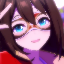

save faces/tmp/3_222.jpg
120.0[sec]


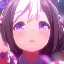

save faces/tmp/3_223.jpg
120.0[sec]


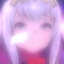

save faces/tmp/3_224.jpg
120.0[sec]


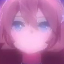

save faces/tmp/3_225.jpg
120.5[sec]


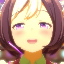

save faces/tmp/3_226.jpg
121.0[sec]


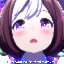

save faces/tmp/3_227.jpg
121.5[sec]


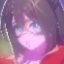

save faces/tmp/3_228.jpg
122.0[sec]


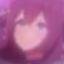

save faces/tmp/3_229.jpg
122.0[sec]


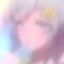

save faces/tmp/3_230.jpg
122.0[sec]


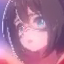

save faces/tmp/3_231.jpg
122.5[sec]


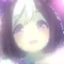

save faces/tmp/3_232.jpg
122.5[sec]


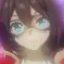

save faces/tmp/3_233.jpg
122.5[sec]


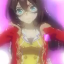

save faces/tmp/3_234.jpg
122.5[sec]


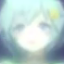

save faces/tmp/3_235.jpg
122.5[sec]


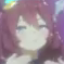

save faces/tmp/3_236.jpg
123.0[sec]


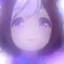

save faces/tmp/3_237.jpg
123.0[sec]


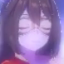

save faces/tmp/3_238.jpg
123.0[sec]


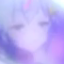

save faces/tmp/3_239.jpg
123.0[sec]


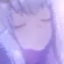

save faces/tmp/3_240.jpg
123.5[sec]


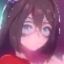

save faces/tmp/3_241.jpg
124.5[sec]


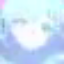

save faces/tmp/3_242.jpg
124.5[sec]


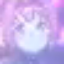

save faces/tmp/3_243.jpg
125.0[sec]


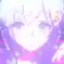

save faces/tmp/3_244.jpg
125.0[sec]


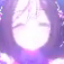

save faces/tmp/3_245.jpg
125.0[sec]


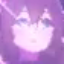

save faces/tmp/3_246.jpg
125.0[sec]


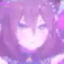

save faces/tmp/3_247.jpg
125.0[sec]


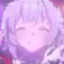

save faces/tmp/3_248.jpg
125.0[sec]


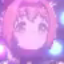

save faces/tmp/3_249.jpg
125.5[sec]


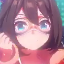

save faces/tmp/3_250.jpg
125.5[sec]


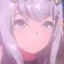

save faces/tmp/3_251.jpg
125.5[sec]


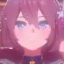

save faces/tmp/3_252.jpg
126.0[sec]


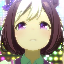

save faces/tmp/3_253.jpg
126.0[sec]


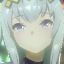

save faces/tmp/3_254.jpg
126.5[sec]


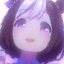

save faces/tmp/3_255.jpg
126.5[sec]


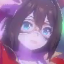

save faces/tmp/3_256.jpg
126.5[sec]


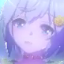

save faces/tmp/3_257.jpg
126.5[sec]


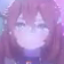

save faces/tmp/3_258.jpg
126.5[sec]


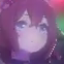

save faces/tmp/3_259.jpg
126.5[sec]


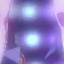

save faces/tmp/3_260.jpg
127.0[sec]


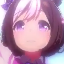

save faces/tmp/3_261.jpg
127.0[sec]


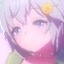

save faces/tmp/3_262.jpg
127.0[sec]


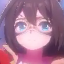

save faces/tmp/3_263.jpg
127.0[sec]


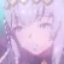

save faces/tmp/3_264.jpg
127.0[sec]


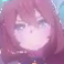

save faces/tmp/3_265.jpg
128.0[sec]


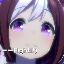

save faces/tmp/3_266.jpg
129.0[sec]


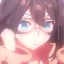

save faces/tmp/3_267.jpg
129.0[sec]


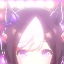

save faces/tmp/3_268.jpg
129.0[sec]


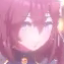

save faces/tmp/3_269.jpg
129.0[sec]


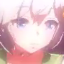

save faces/tmp/3_270.jpg
129.0[sec]


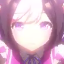

save faces/tmp/3_271.jpg
129.5[sec]


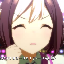

save faces/tmp/3_272.jpg
130.0[sec]


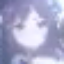

save faces/tmp/3_273.jpg
130.5[sec]


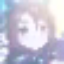

save faces/tmp/3_274.jpg
131.0[sec]


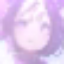

save faces/tmp/3_275.jpg
131.0[sec]


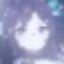

save faces/tmp/3_276.jpg
131.0[sec]


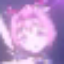

save faces/tmp/3_277.jpg
131.5[sec]


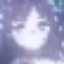

save faces/tmp/3_278.jpg
131.5[sec]


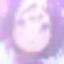

save faces/tmp/3_279.jpg
131.5[sec]


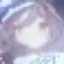

save faces/tmp/3_280.jpg
132.0[sec]


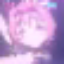

save faces/tmp/3_281.jpg
132.5[sec]


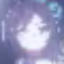

save faces/tmp/3_282.jpg
132.5[sec]


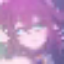

save faces/tmp/3_283.jpg
133.0[sec]


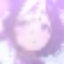

save faces/tmp/3_284.jpg
133.0[sec]


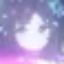

save faces/tmp/3_285.jpg
133.0[sec]


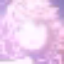

save faces/tmp/3_286.jpg
133.5[sec]


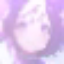

save faces/tmp/3_287.jpg
133.5[sec]


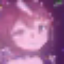

save faces/tmp/3_288.jpg
135.5[sec]


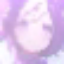

save faces/tmp/3_289.jpg
135.5[sec]


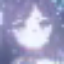

save faces/tmp/3_290.jpg


KeyboardInterrupt: ignored

In [7]:
#必要なライブラリをインポート
import cv2
from google.colab.patches import cv2_imshow # パッチファイルインポート

#顔検出器の準備
classifier = cv2.CascadeClassifier("lbpcascade_animeface.xml")

#画像につけるナンバー
ver = 3 #読み込む動画を変える毎に変更する（生成する画像ファイルの名前が被らないようにするため）
img = 0

msec = 0 #動画内の時間
output_dir = "faces/"

#動画の読み込み
cap = cv2.VideoCapture("img/4.MP4")
while(cap.isOpened()):
  cap.set(0, msec*1000)
  ret, frame = cap.read()
  if ret:
    #グレースケール化して顔検出し座標を取得
    frame = cv2.rotate(frame, cv2.ROTATE_90_COUNTERCLOCKWISE) #なぜか読み込む動画が90度回転してしまっていたため，元に戻す
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = classifier.detectMultiScale(gray_image)
    
    for i, (x, y, w, h) in enumerate(faces):
      #表示している画像の時間
      print(str(msec) + "[sec]")
      face_image = frame[y:y+h, x:x+w]

      #画像サイズを64*64にリサイズ
      face_image_resize = cv2.resize(face_image, (64, 64))

      #切り出した顔の表示
      cv2_imshow(face_image_resize)

      #生成した画像の保存先を指定
      output_path = output_dir + "tmp/{}_{}.jpg".format(ver, img)

      img += 1

      #生成した画像の保存
      print("save " + output_path)
      cv2.imwrite(output_path, face_image_resize)

    msec += 0.5

  else:
    break

cap.release()